# Vectorized sequence alignment diagrams

In [1]:
import sys
import math
print(sys.version)

3.11.4 (main, Jun  9 2023, 07:59:55) [GCC 12.3.0]


In [2]:
from genetracks import Figure, Track, Alignment, Multitrack, Label, Coverage

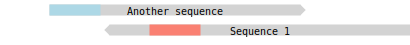

In [3]:
f = Figure()
t1 = Track(50, 300, direction='f', label="Another sequence", regions=[(50, 100, 'lightblue')])
t2 = Track(110, 410, direction='r', label="Sequence 1", regions=[(150, 200, 'salmon')])
f.add(t1)
f.add(t2)
f.show()

## Linear tracks

### Multitracks
In this example we pack multiple tracks onto the same row and join them to illustrate gaps. The child tracks inherit the parent's translations.

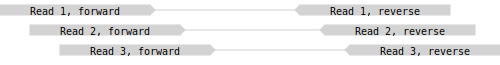

In [4]:
f = Figure()
for i in range(0,3):
    o = i * 30
    e = i * 25
    f.add(Multitrack([
        Track(o, 150 + o, direction='f', label='Read {}, forward'.format(i + 1)),
        Track(300 + e, 450 + e, direction='r', label='Read {}, reverse'.format(i + 1))], join=True))
f.show()

### Directionality
Tracks can be rendered with arrows indicating strand direction.

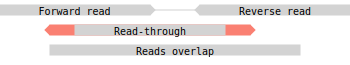

In [5]:
figure = Figure()
figure.add(Multitrack([
        Track(0, 150, direction='f', label='Forward read'),
        Track(200, 350, direction='r', label='Reverse read')], join=True))
figure.add(Track(50, 250, direction='fr', label='Read-through', color='salmon', regions=[(75, 225, 'lightgrey')]))
figure.add(Track(50, 300, label='Reads overlap'))
figure.show()

The `Alignment` class allows us to illustrate the relationship between regions of two different tracks:

### Alignment
Regions between two tracts can be illustrated with an `Alignment`.

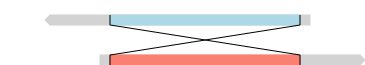

In [6]:
f = Figure()
f.add(Alignment(Track(50, 310, direction='r', regions=[(110, 300, 'lightblue')]),
                Track(100, 360, direction='f', regions=[(110, 300, 'salmon')]),
               [(110, 300), (300, 110)]))
f.show()

### Label Objects
Label offsets and text size can be adjusted to make informative tracks.

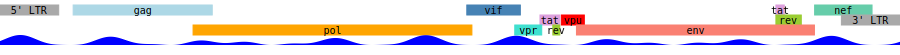

In [7]:
f = Figure()

def draw_hiv_genes(f):
    third = [
        (2085, 5096, "pol", "orange"),
        (5559, 5850, "vpr", "turquoise"),
        (5970, 6045, "rev", 'yellowgreen'),
        (6225, 8795, "env", 'salmon'),
    ]
    second = [
        (5831, 6045, "tat", "plum"),
        (6062, 6310, "vpu", "red"),
        (8379, 8653, "rev", 'yellowgreen'),
        (9086, 9719, "3' LTR", 'darkgrey'),
    ]

    first = [
        (0, 634, "5' LTR", "darkgrey"),
        (790, 2292, "gag", "lightblue"),
        (5041, 5619, "vif", 'steelblue'),
        (8379, 8469, "tat", 'plum'),
        (8797, 9417, "nef", 'mediumaquamarine'),
    ]

    for reading_frame in [first, second, third]:
        f.add(Multitrack([Track(l, r, label=Label(0, text, offset=1), color=color)
                          for l, r, text, color in reading_frame]), gap=0)

draw_hiv_genes(f)

ys = []
for x in range(0, 9719):
    y = math.sin(x/130) + 1.5
    y *= math.sin((x + 50)/ 160) + 1
    ys.append(y)
        
f.add(Coverage(0, 9716, ys))
f.show(w=900)